## IMPORTING REQUIRED LIBRARIES

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## READING THE DATASET

In [12]:
dataset = pd.read_json("Amazon_Instant_Video_5.json", lines = True)
dataset.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009"


### creating new column "reviews" which displays length of reviewText

In [13]:
dataset['Reviews'] = dataset['reviewText'].astype(str).map(len) 

In [14]:
dataset.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Reviews
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014",159
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5,Excellent Grown Up TV,1346630400,"09 3, 2012",186
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013",134
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013",141
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5,Robson green and great writing,1234310400,"02 11, 2009",1300


### Creating new dataset having features having review length  upto 180 words

In [15]:
df_rev = dataset[dataset['Reviews'] <= 180]

In [16]:
df_rev.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,Reviews
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2,A little bit boring for me,1399075200,"05 3, 2014",159
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1,Way too boring for me,1381881600,"10 16, 2013",134
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4,Robson Green is mesmerizing,1383091200,"10 30, 2013",141
6,A1PG2VV4W1WRPL,B000H0X79O,"Jimmy C. Saunders ""Papa Smurf""","[0, 0]","It beats watching a blank screen. However, I j...",3,It takes up your time.,1381795200,"10 15, 2013",99
9,AUX8EUBNTHIIU,B000H0X79O,Louis V. Borsellino,"[0, 0]",Not bad. Didn't know any of the comedians but...,3,Entertaining Comedy,1396396800,"04 2, 2014",127


In [17]:
df_rev.shape

(14030, 10)

## EXPLORATORY DATA ANALYSIS

In [27]:
print('Total number of reviews:',len(df_rev))
print("Total number of products:",len(df_rev["asin"].unique()))

Total number of reviews: 14030
Total number of products: 1551


In [28]:
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df_rev[df_rev['overall']>3]["overall"].count()/len(df_rev)*100))

print("\nPercentage of reviews with neutral sentiment : {:.2f}%"\
      .format(df_rev[df_rev['overall']==3]["overall"].count()/len(df_rev)*100))

print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df_rev[df_rev['overall']<3]["overall"].count()/len(df_rev)*100))


Percentage of reviews with positive sentiment : 84.97%

Percentage of reviews with neutral sentiment : 8.11%

Percentage of reviews with negative sentiment : 6.92%


### MISSING VALUES

In [29]:
features_with_na = [feature for feature in df_rev.columns if df_rev[feature].isnull().sum()>1]

for feature in features_with_na:
    print(f"The {feature} has {df_rev[feature].isnull().sum()} null values")

The reviewerName has 125 null values


### HANDLING THE MISSING VALUES

In [30]:
df_rev["reviewerName"].fillna("Anonymous",inplace = True)

In [31]:
df_rev.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
Reviews           0
dtype: int64

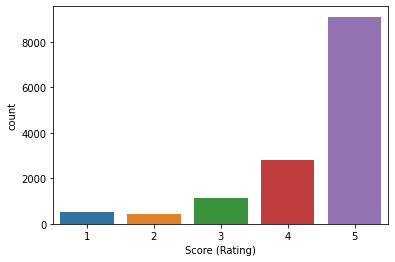

In [32]:
plt.figure()
sns.countplot(x='overall', data = df_rev)
plt.xlabel('Score (Rating)')
plt.show()

### OBSERVATION:
Amount of rating 5 is twice as compared to other ratings combined all together.

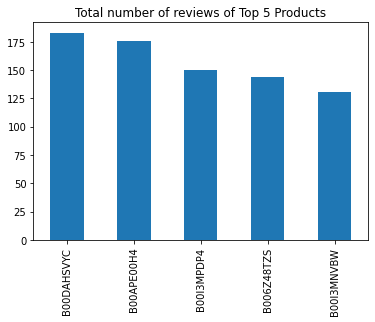

In [33]:
products = df_rev["asin"].value_counts()
products[:5].plot(kind = "bar")
plt.title("Total number of reviews of Top 5 Products")
plt.show()

In [69]:
## assigning whether review sentiment is positive, neutral or negative on the basis of overall rating

def labelFunc(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return "Neutral"
df_rev["Sentiment"] = df_rev["overall"].apply(labelFunc)     

### Creating new dataframe consisting of **reviewText** and **Sentiments**

In [36]:
reviews_df = df_rev.loc[: , ["reviewText","Sentiment"]]
reviews_df.head()

,reviewText,Sentiment
0,I had big expectations because I love English ...,Negative
2,This one is a real snoozer. Don't believe anyt...,Negative
3,Mysteries are interesting. The tension betwee...,Positive
6,"It beats watching a blank screen. However, I j...",Neutral
9,Not bad. Didn't know any of the comedians but...,Neutral


In [37]:
reviews_df.reset_index(drop = True,inplace = True)

In [38]:
reviews_df.shape

(14030, 2)

### CLEANING THE TEXT

In [40]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(0,14030):
    review = re.sub("[^a-zA-Z]"," ",reviews_df["reviewText"][i])
    review = review.lower()
    review = review.split()
    lem = WordNetLemmatizer()
    review = [lem.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

In [41]:
corpus[:5]

['big expectation love english tv particular investigative detective stuff guy really boring appeal',
 'one real snoozer believe anything read hear awful idea title mean neither',
 'mystery interesting tension robson tall blond good always believable often seemed uncomfortable',
 'beat watching blank screen however seem tune comedy today',
 'bad know comedian first time viewing put smile face check next season soon']

### CREATING BAG OF WORDS

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = reviews_df.iloc[:,1].values

In [43]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### TRAIN TEST SPLIT

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state =0)

# BUILDING THE MODEL

### LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
model = classifier.fit(X_train,y_train)

In [46]:
predict = model.predict(X_test)

In [47]:
comp = pd.DataFrame({"Actual":y_test,"FINAL":predict})
comp.head()

,Actual,FINAL
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Negative,Positive


### ERROR METRICS : LOGISTIC REGRESSION

In [48]:
from sklearn import metrics

In [49]:
cm = metrics.confusion_matrix(y_test,predict)
cm

array([[  96,   27,   90],
       [  28,   39,  152],
       [  30,   55, 2289]], dtype=int64)

In [50]:
print(metrics.classification_report(y_test,predict))

              precision    recall  f1-score   support

    Negative       0.62      0.45      0.52       213
     Neutral       0.32      0.18      0.23       219
    Positive       0.90      0.96      0.93      2374

    accuracy                           0.86      2806
   macro avg       0.62      0.53      0.56      2806
weighted avg       0.84      0.86      0.85      2806



### NAIVE BAYES CLASSIFIER

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
model = classifier.fit(X_train,y_train)

In [52]:
y_pred = model.predict(X_test)

In [55]:
comp = pd.DataFrame({"Actual":y_test,"FINAL":y_pred})
comp.head()

,Actual,FINAL
0,Positive,Positive
1,Positive,Positive
2,Positive,Negative
3,Positive,Negative
4,Negative,Negative


### ERROR METRICS : NAIVE BAYES CLASSIFIER

In [53]:
cm = metrics.confusion_matrix(y_test,y_pred)

In [54]:
cm

array([[ 140,   41,   32],
       [ 126,   51,   42],
       [1024,  601,  749]], dtype=int64)

In [51]:
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

    Negative       0.13      0.58      0.22       157
     Neutral       0.07      0.23      0.11       154
    Positive       0.90      0.45      0.60      1714

    accuracy                           0.44      2025
   macro avg       0.37      0.42      0.31      2025
weighted avg       0.78      0.44      0.53      2025



### RANDOM FOREST CLASSIFIER

In [56]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

model = clf.fit(X_train,y_train)

In [57]:
y_pred = model.predict(X_test)

In [58]:
comp = pd.DataFrame({"Actual":y_test,"FINAL":y_pred})
comp.head()

,Actual,FINAL
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Negative,Positive


### ERROR METRICS : RANDOM FOREST CLASSIFIER

In [59]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[  45,    6,  162],
       [   8,   16,  195],
       [   2,    7, 2365]], dtype=int64)

In [60]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.82      0.21      0.34       213
     Neutral       0.55      0.07      0.13       219
    Positive       0.87      1.00      0.93      2374

    accuracy                           0.86      2806
   macro avg       0.75      0.43      0.46      2806
weighted avg       0.84      0.86      0.82      2806



### DECISION TREE CLASSIFIER

In [61]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
model = clf.fit(X_train,y_train)

In [62]:
y_pred = model.predict(X_test)

In [63]:
comp = pd.DataFrame({"Actual":y_test,"FINAL":y_pred})
comp.head()

,Actual,FINAL
0,Positive,Positive
1,Positive,Positive
2,Positive,Positive
3,Positive,Positive
4,Negative,Positive


### ERROR METRICS : DECISION TREE CLASSIFIER

In [64]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7972202423378475


In [65]:
print("CLASSIFICATION REPORT\n")
print(metrics.classification_report(y_test,y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

    Negative       0.36      0.27      0.31       213
     Neutral       0.18      0.21      0.20       219
    Positive       0.89      0.90      0.89      2374

    accuracy                           0.80      2806
   macro avg       0.48      0.46      0.47      2806
weighted avg       0.80      0.80      0.80      2806



#### ACCURACY OF LOGISTIC REGRESSION : 86 %
#### ACCURACY OF NAIVE BAYES : 44 %
#### ACCURACY OF RANDOM FOREST CLASSIFIER : 86 %
#### ACCURACY OF DECISION TREE CLASSIFIER : 80 %

### ALGORITHMS LOGISTIC REGRESSION AND RANDOM FOREST CLASSIFIER GIVES US BETTER ACCURACY AS COMPARED TO OTHER ALGORITHMS.